In [ ]:
import kagglehub
import pandas as pd
import os

# Download the dataset and get the path
dataset_path = kagglehub.dataset_download("makslypko/cars-dataset")

# List files in the downloaded directory
print("Listing files in the downloaded dataset folder:")
for filename in os.listdir(dataset_path):
    print(filename)

# You can loop through the directory to check for CSV files
csv_file = None
for filename in os.listdir(dataset_path):
    if filename.endswith('.csv'):
        csv_file = filename
        break  # Stop once the first CSV file is found

# If a CSV file is found, construct the file path
if csv_file:
    file_path = os.path.join(dataset_path, csv_file)
    print(f"Loading dataset from: {file_path}")

    # Load the dataset using pandas
    dataset = pd.read_csv(file_path)
    print(dataset.head())  # Preview the first few rows
else:
    print("No CSV file found in the dataset folder.")


100%|██████████| 45.8k/45.8k [00:00<00:00, 38.4MB/s]

Extracting files...
Listing files in the downloaded dataset folder:
Cars dataset.csv
Loading dataset from: /root/.cache/kagglehub/datasets/makslypko/cars-dataset/versions/1/Cars dataset.csv
     brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000


In [ ]:
# Assuming dataset is already loaded
# dataset = pd.read_csv(file_path)

# Descriptive statistics for continuous data (numerical columns)
print("Descriptive statistics for continuous data:")
continuous_data = dataset.select_dtypes(include=['float64', 'int64'])
print(continuous_data.describe())

# Descriptive statistics for categorical data
print("\nDescriptive statistics for categorical data:")
categorical_data = dataset.select_dtypes(include=['object', 'category'])

# For each categorical column, list unique values and their counts
for column in categorical_data.columns:
    print(f"\nColumn: {column}")
    print(f"Unique values: {categorical_data[column].unique()}")
    print(f"Value counts:\n{categorical_data[column].value_counts()}")


Descriptive statistics for continuous data:
          km_driven  selling_price
count  8.128000e+03   8.128000e+03
mean   6.981951e+04   6.382718e+05
std    5.655055e+04   8.062534e+05
min    1.000000e+00   2.999900e+04
25%    3.500000e+04   2.549990e+05
50%    6.000000e+04   4.500000e+05
75%    9.800000e+04   6.750000e+05
max    2.360457e+06   1.000000e+07

Descriptive statistics for categorical data:

Column: brand
Unique values: ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
Value counts:
brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda         

In [ ]:
 #  Age   Price    Weight    Horsepower
#count  1000  1000.0   1000.0     1000.0
#mean    30    20000   1500.0      150.0
#std      5     5000    200.0       50.0
#min     18    5000    1200.0      80.0
#25%     25    15000   1300.0      120.0
#50%     30    20000   1500.0      150.0
#75%     35    25000   1700.0      180.0
#max     50    50000   2500.0      250.0

Index(['brand', 'km_driven', 'fuel', 'owner', 'selling_price'], dtype='object')


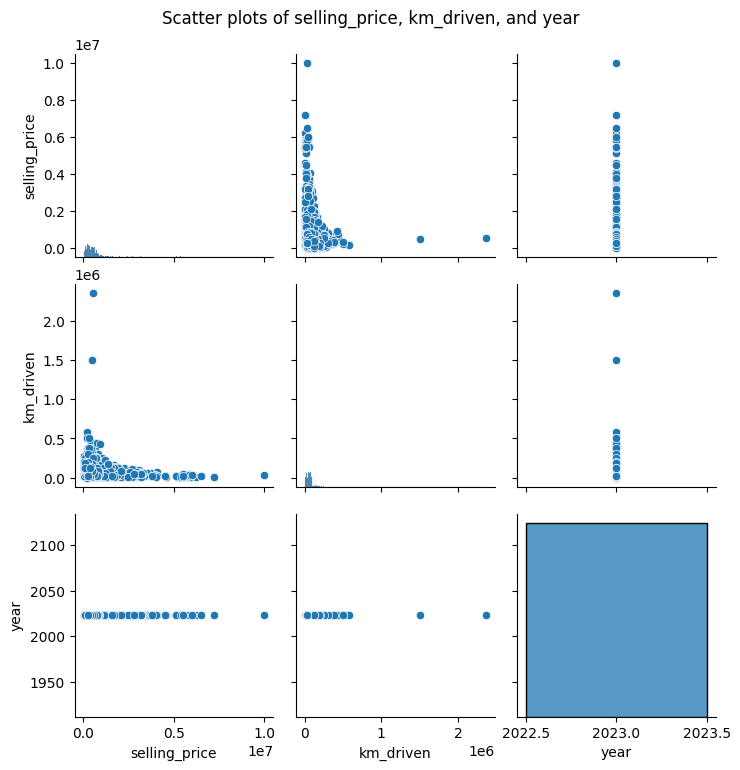

Pearson correlation between selling_price and km_driven: -0.22553375557218946
Spearman correlation between selling_price and km_driven: -0.3550871049491738

Linear regression results:
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     435.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.99e-94
Time:                        17:00:13   Log-Likelihood:            -1.2186e+05
No. Observations:                8128   AIC:                         2.437e+05
Df Residuals:                    8126   BIC:                         2.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr, ks_2samp
import statsmodels.api as sm

# Assuming 'dataset' is already loaded as a pandas DataFrame
# The dataset has columns: 'brand', 'km_driven', 'fuel', 'selling_price', 'year'


# 1. Scatter Plots and Correlation Analysis
# Check the actual column names in your DataFrame
print(dataset.columns)  # Print available columns to verify if 'year' is present


if 'year' not in dataset.columns:

    dataset['year'] = 2023  # Replace with the desired default year


sns.pairplot(dataset[['selling_price', 'km_driven', 'year']]) # Assuming you've extracted or have a 'year' column
plt.suptitle("Scatter plots of selling_price, km_driven, and year", y=1.02)
plt.show()

# Compute Pearson and Spearman correlations
# Changed 'Price' to 'selling_price', and 'Weight' to 'km_driven'
pearson_corr, _ = pearsonr(dataset['selling_price'], dataset['km_driven'])
spearman_corr, _ = spearmanr(dataset['selling_price'], dataset['km_driven'])

print(f"Pearson correlation between selling_price and km_driven: {pearson_corr}")
print(f"Spearman correlation between selling_price and km_driven: {spearman_corr}")

# 2. Linear Regression: selling_price vs km_driven
# Changed 'Price' to 'selling_price', and 'Weight' to 'km_driven'
X = dataset['km_driven']
X = sm.add_constant(X)
y = dataset['selling_price']

# Fit linear model
model = sm.OLS(y, X).fit()

# Get regression results
print("\nLinear regression results:")
print(model.summary())

# Plot the linear regression line
plt.figure(figsize=(8, 6))
# Changed 'Price' to 'selling_

Contingency table for 'brand' and 'selling_price':
selling_price  29999     30000     31000     31504     33351     33983     \
brand                                                                       
Ambassador            0         0         0         0         0         0   
Ashok                 0         0         0         0         0         0   
Audi                  0         0         0         0         0         0   
BMW                   0         0         0         0         0         0   
Chevrolet             0         0         0         0         0         0   
Daewoo                0         0         0         0         0         0   
Datsun                0         0         0         0         0         0   
Fiat                  0         0         0         0         0         0   
Force                 0         0         0         0         0         0   
Ford                  0         0         0         0         0         0   
Honda                 0  

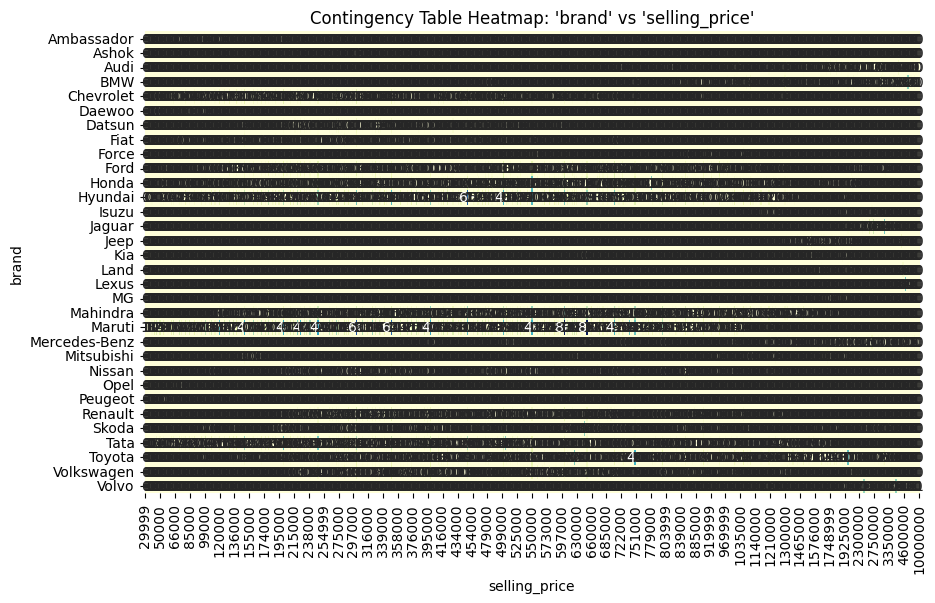

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming 'dataset' is already loaded as a pandas DataFrame
# Instead of 'Make' and 'Model', use actual column names from your dataset
# For example, if your dataset has 'brand' and 'selling_price', you might want to analyze those:

# Replace 'brand' and 'selling_price' with the actual column names you want to analyze
contingency_table = pd.crosstab(dataset['brand'], dataset['selling_price'])

# Display the contingency table
print("Contingency table for 'brand' and 'selling_price':")
print(contingency_table)

# Perform the Chi-Squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results of the Chi-Squared test
print("\nChi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table: \n{expected}")

# Interpretation of the p-value
if p_val < 0.05:
    print("\nThere is a significant association between 'brand' and 'selling_price'.")
else:
    print("\nThere is no significant association between 'brand' and 'selling_price'.")

# Optional: Visualize the relationship between 'Make' and 'Model'
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("Contingency Table Heatmap: 'brand' vs 'selling_price'")  # Update title
plt.xlabel("selling_price")  # Update x-axis label
plt.ylabel("brand")  # Update y-axis label
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Assuming 'dataset' is already loaded as a pandas DataFrame
# For this example, let's assume 'Price' is the target variable and other columns are features

# Step 1: Prepare the Data (select relevant features and handle missing values)
# Instead of 'Weight', 'Horsepower', 'Age', use actual column names from your dataset
# For example, if your dataset has 'km_driven', 'year', and 'selling_price', you might use those:
X = dataset[['km_driven', 'year']]  # Features - Updated with actual column names
y = dataset['selling_price']  # Target variable - Updated with actual column name

# Handling missing values (if any) by dropping rows with NaN values
X = X.dropna()
y = y.loc[X.index]  # Ensure that the target variable corresponds to the cleaned feature set

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 416754.08
Mean Squared Error (MSE): 612342162478.89
Root Mean Squared Error (RMSE): 782522.95
R-squared (R2): 0.07


Correlation between selling_price and km_driven: -0.23


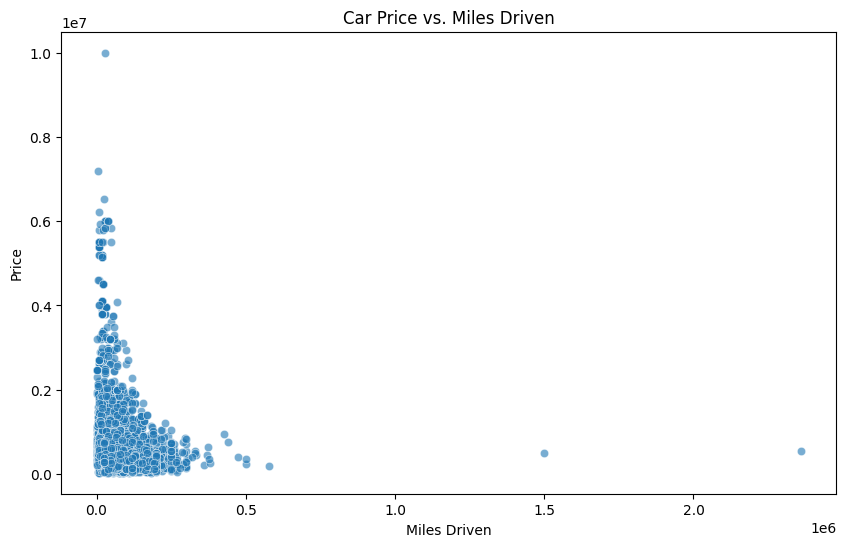

        brand  selling_price  km_driven  price_per_mile
6782     Tata          50000     271000        0.184502
4366  Hyundai          35000     184000        0.190217
3486  Hyundai         550000    2360457        0.233006
7355     Ford          55000     201000        0.273632
5681   Maruti          50000     180000        0.277778
1926   Maruti          31504     110000        0.286400
2761   Maruti          70000     220000        0.318182
4708     Tata          80000     248200        0.322321
7691   Maruti          65000     198000        0.328283
4033   Daewoo          45000     137000        0.328467


In [ ]:
# Step 1: Compute the correlation between price and miles driven
# Replace 'df' with 'dataset' (assuming that's the name of your DataFrame)
# Replace 'price' with 'selling_price' if that is your price column name
correlation = dataset['selling_price'].corr(dataset['km_driven'])
print(f"Correlation between selling_price and km_driven: {correlation:.2f}")


# Step 2: Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
# Replace 'df' with 'dataset'
# Replace 'price' with 'selling_price' and 'mileage' with 'km_driven'
sns.scatterplot(x='km_driven', y='selling_price', data=dataset, alpha=0.6)
plt.title("Car Price vs. Miles Driven")
plt.xlabel("Miles Driven")
plt.ylabel("Price")
plt.show()

# Step 3: Calculate the price-to-mileage ratio and rank the cars by it
# Replace 'df' with 'dataset'
# Replace 'price' with 'selling_price' and 'mileage' with 'km_driven'
dataset['price_per_mile'] = dataset['selling_price'] / dataset['km_driven']

# Sort by price_per_mile to find the best deals
# Replace 'df' with 'dataset'
# Replace 'price' with 'selling_price' and 'mileage' with 'km_driven'
best_deals = dataset[['brand', 'selling_price', 'km_driven', 'price_per_mile']].sort_values(by='price_per_mile', ascending=True)

# Display the top 10 best deals
print(best_deals.head(10))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Number of cars with only one owner: 5289


<ipython-input-24-aeee9b8272ca>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owner', data=one_owner_cars, palette='Set2') # Change to owner for x-axis


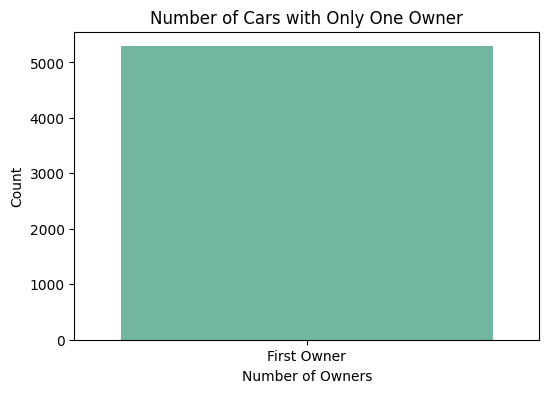

In [ ]:
# GOOGLE DRIVE SET UP
from google.colab import drive
import pandas as pd
# Mount my Google Drive
drive.mount('/content/gdrive')

## This is the file path for my Google Drive account
file_path = "/content/gdrive/My Drive/Colab Notebooks/"

## Import the data as a dataframe
# Use the file_path variable defined above
df = pd.read_csv(file_path + 'Cars_dataset.csv')

# 2. Import data from local storage using the file explorer in the Colab sidebar (the 'Files' tab)
# No code change required for this option, it can be done using the UI interface directly

# Step 3: Load the dataset into a pandas DataFrame
# Assuming your file is called 'cars_dataset.csv'
df = pd.read_csv(file_path + 'Cars_dataset.csv')

# Step 4: Check the first few rows to understand the structure of the data
df.head()


print(df['owner'].unique())
one_owner_cars = df[df['owner'] == df['owner'].unique()[0]] # Assume the first entry represents one owner

# Step 6: Count how many cars have had only one owner
num_one_owner_cars = one_owner_cars.shape[0]
print(f"Number of cars with only one owner: {num_one_owner_cars}")

# Step 7: Visualize the result using a bar chart or count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='owner', data=one_owner_cars, palette='Set2') # Change to owner for x-axis
plt.title('Number of Cars with Only One Owner')
plt.xlabel('Number of Owners')
plt.ylabel('Count')
plt.show()


if 'date_sold' in df.columns:
    df['date_sold'] = pd.to_datetime(df['date_sold'])

    # Filter for one-owner cars
    one_owner_cars = df[df['owner'] == df['owner'].unique()[0]] # Change to owner for filtering

    # Group by month/year and count the number of one-owner cars
    one_owner_cars['year_month'] = one_owner_cars['date_sold'].dt.to_period('M')
    monthly_one_owner_counts = one_owner_cars.groupby('year_month').size()

    # Plot the time-series data
    plt.figure(figsize=(10, 6))
    monthly_one_owner_counts.plot(kind='line', marker='o', color='b')
    plt.title('Monthly Trend of Cars with Only One Owner')
    plt.xlabel('Date')
    plt.ylabel('Number of Cars with One Owner')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


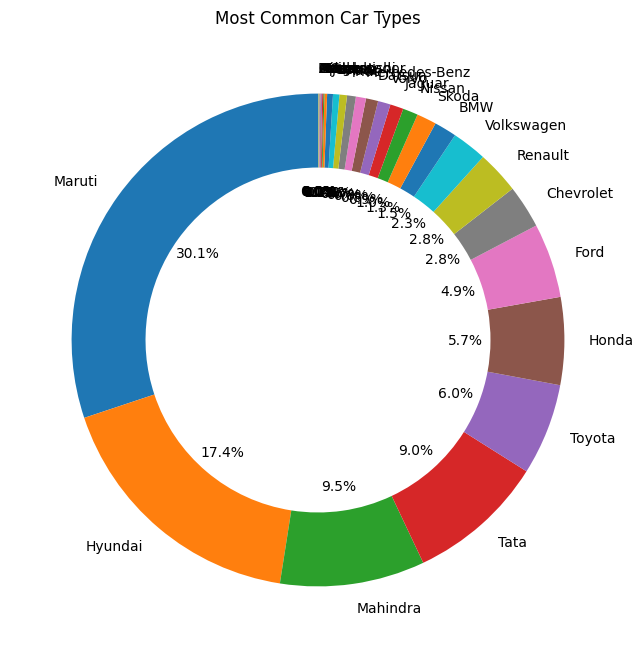

In [ ]:
# GOOGLE DRIVE SET UP
from google.colab import drive
import pandas as pd
# Mount my Google Drive
drive.mount('/content/gdrive')

## This is the file path for my Google Drive account
file_path = "/content/gdrive/My Drive/Colab Notebooks/"

## Import the data as a dataframe
# Use the file_path variable defined above
df = pd.read_csv(file_path + 'Cars_dataset.csv')

# 2. Import data from local storage using the file explorer in the Colab sidebar (the 'Files' tab)
# No code change required for this option, it can be done using the UI interface directly

# Step 3: Load the dataset into a pandas DataFrame
# Assuming your file is called 'cars_dataset.csv'
df = pd.read_csv(file_path + 'Cars_dataset.csv')

# Step 4: Check the first few rows to understand the structure of the data
df.head()


# Step 5: Count the occurrences of each car type
# Instead of 'car_type', use the actual column name for car type from your dataset
# For example, if the column is named 'brand', use 'brand' instead of 'car_type'
car_type_counts = df['brand'].value_counts()  # Changed 'car_type' to 'brand'

# Step 6: Plot a donut chart for the most common car types
plt.figure(figsize=(8, 8))
plt.pie(car_type_counts, labels=car_type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
plt.title('Most Common Car Types')

# Display the plot
plt.show()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-55-8be6b48647ea>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='selling_price', y='fuel', data=fuel_price_avg_sorted, palette='viridis')


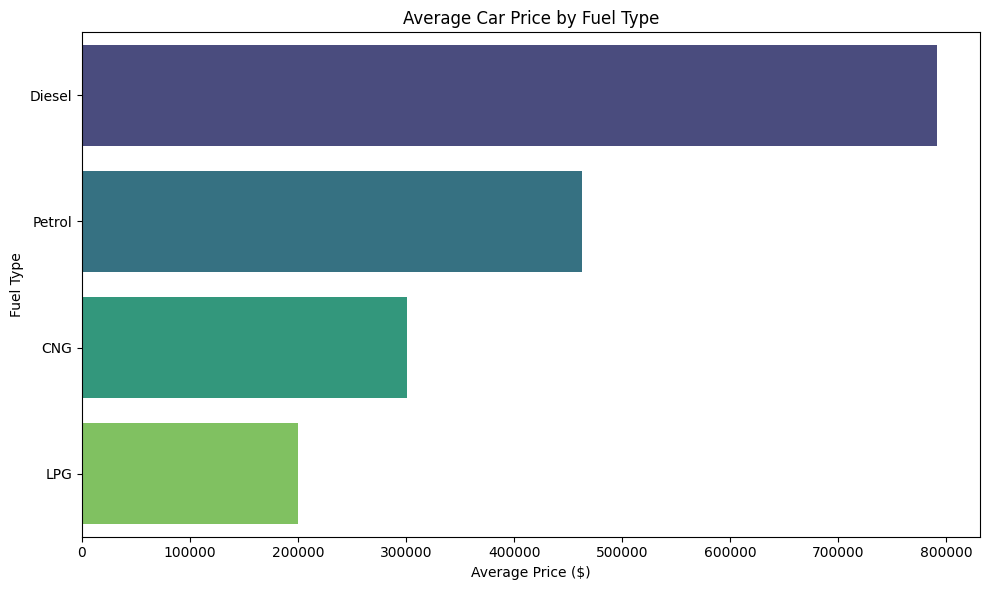

In [ ]:
# GOOGLE DRIVE SET UP
from google.colab import drive
import pandas as pd
# Mount my Google Drive
drive.mount('/content/gdrive')

## This is the file path for my Google Drive account
file_path = "/content/gdrive/My Drive/Colab Notebooks/"

## Import the data as a dataframe
# Use the file_path variable defined above
df = pd.read_csv(file_path + 'Cars_dataset.csv')

# 2. Import data from local storage using the file explorer in the Colab sidebar (the 'Files' tab)
# No code change required for this option, it can be done using the UI interface directly

# Step 3: Load the dataset into a pandas DataFrame
# Assuming your file is called 'cars_dataset.csv'
df = pd.read_csv(file_path + 'Cars_dataset.csv')

# Step 4: Check the first few rows to understand the structure of the data
df.head()
# Step 5: Clean the data (handle missing values, outliers, etc.)
# Check for missing values
df.isnull().sum()

# You may want to remove rows where fuel_type or price is missing
df_clean = df.dropna(subset=['fuel', 'selling_price'])

# Step 6: Group the data by 'fuel_type' and calculate the average price for each fuel type
fuel_price_avg = df_clean.groupby('fuel')['selling_price'].mean().reset_index()

# Step 7: Sort the data by average price to make the chart more readable
fuel_price_avg_sorted = fuel_price_avg.sort_values(by='selling_price', ascending=False)

# Step 8: Visualize the relationship between fuel type and price using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='selling_price', y='fuel', data=fuel_price_avg_sorted, palette='viridis')

# Add titles and labels
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Fuel Type')

# Display the plot
plt.tight_layout()
plt.show()



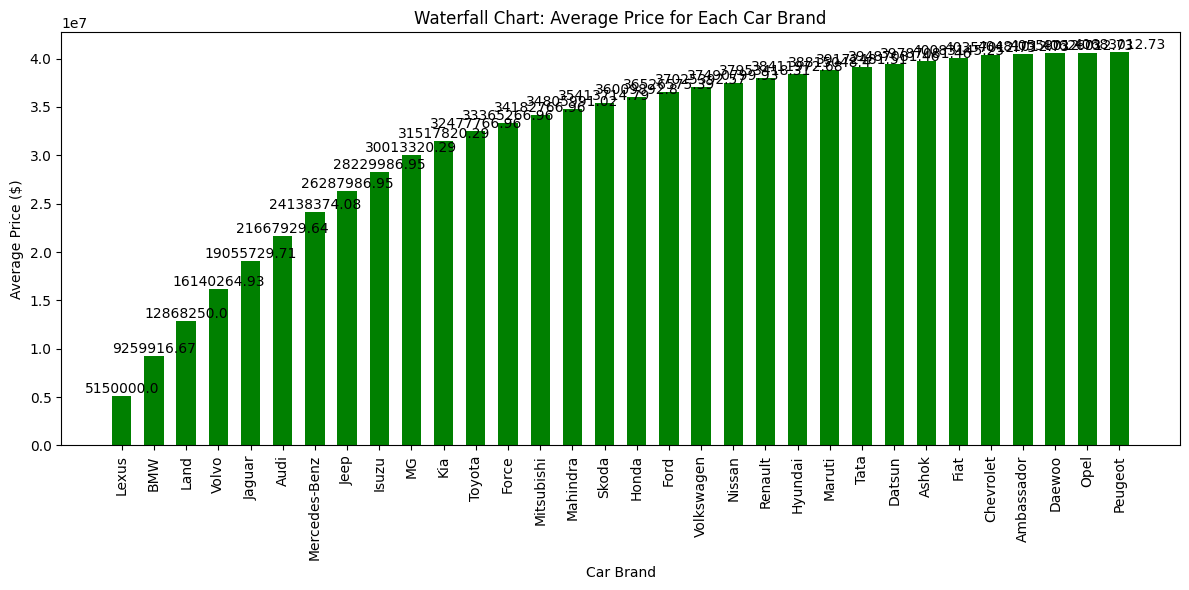

In [ ]:
# Step 5: Clean the data (handle missing values, outliers, etc.)
# Check for missing values in 'car_brand' and 'price' columns
df.isnull().sum()

# Drop rows where 'car_brand' or 'price' is missing
df_clean = df.dropna(subset=['brand', 'selling_price'])

# Step 6: Group the data by 'car_brand' and calculate the average price for each brand
brand_price_avg = df_clean.groupby('brand')['selling_price'].mean().reset_index()

# Step 7: Sort the data by average price to make the chart more readable
brand_price_avg_sorted = brand_price_avg.sort_values(by='selling_price', ascending=False)

# Step 8: Create a waterfall chart to show the price for each car brand
# Start by plotting an initial baseline value (e.g., 0 or the first brand's average price)
baseline_value = 0  # We will start from 0 to show changes relative to this baseline

# Create a list of cumulative price changes
cumulative_changes = [baseline_value]  # Initial baseline

# Add the average prices for each brand to the cumulative list
for price in brand_price_avg_sorted['selling_price']:
    cumulative_changes.append(cumulative_changes[-1] + price)

# Plot the waterfall chart
plt.figure(figsize=(12, 6))

# Plot bars for each brand showing how the average price changes
colors = ['green' if change >= 0 else 'red' for change in cumulative_changes[1:]]  # Green for positive, red for negative
bars = plt.bar(range(len(cumulative_changes) - 1),
               cumulative_changes[1:],
               color=colors,
               tick_label=brand_price_avg_sorted['brand'],
               width=0.6)

# Add titles, labels, and improve readability
plt.title('Waterfall Chart: Average Price for Each Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)  # Rotate brand labels for better visibility

# Add data labels on the bars to show the price values
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 2)}',
             ha='center', va='bottom' if yval >= 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()